In [1]:
#Import needed packages

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import roc_curve
from sklearn import metrics

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold

In [19]:
#load preprocessed data
mrna_x = pd.read_csv('zscore_mutation_methlyation.csv')
mrna_x.drop(columns=mrna_x.columns[0], axis=1, inplace=True)
mrna_x.fillna(0, inplace=True)
y = np.load('processed_recurrence_data_zscore_mutation_methlyation.npy')

print(mrna_x.shape)
X_train, X_test, y_train, y_test = train_test_split(mrna_x.values, y,
                                                    train_size=0.75, test_size=0.25)

age = np.load('age_data_mutation_methylation.npy')
gender = np.load('gender_data_mutation_methlyation.npy')
stage = np.load('stage_data_mutation_methylation.npy')




(210, 49470)


True
False


In [20]:
np.isnan(mrna_x.values).any()

False

In [21]:
#LASSO
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(np.nan_to_num(mrna_x.values), y)
print("Best Params {}".format(lasso_cv.best_params_))

# calling the model with the best parameter
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train, y_train)

# Using np.abs() to make coefficients positive.  
lasso1_coef = np.abs(lasso1.coef_)

names=mrna_x.columns
print("Column Names: {}".format(names.values))
print(len(names))

feature_subset=np.array(names)[lasso1_coef>0.001]
print("Selected Feature Columns: {}".format(feature_subset))
print(len(feature_subset))

lasso_x = mrna_x[feature_subset]
print(lasso_x.shape)

lasso_x['Age'] = age
lasso_x['Gender'] = gender
lasso_x['Stage'] = stage


X_train, X_test, y_train, y_test = train_test_split(lasso_x.values, y,
                                                    train_size=0.75, test_size=0.25, shuffle=True, random_state=123)

c:\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.046e-02, tolerance: 3.828e-03
  model = cd_fast.enet_coordinate_descent(
c:\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.207e-03, tolerance: 3.699e-03
  model = cd_fast.enet_coordinate_descent(
c:\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.057e-02, tolerance: 3.857e-03
  model = cd_fast.enet_coo

Best Params {'alpha': 1e-05}
Column Names: ['LOC100130426' 'UBE2Q2P3' 'UBE2Q2P3.1' ... 'AUH Methylation'
 'RABGAP1 Methylation' 'MAPKAP1 Methylation']
49470
Selected Feature Columns: ['LOC100130426' 'UBE2Q2P3' 'UBE2Q2P3.1' 'TIMM23' 'LOC155060' 'RNU12-2P'
 'EZHIP' 'EFCAB8' 'SRP14P1' 'LOC391343' 'LOC553137' 'RGPD7' 'HSPB1P1'
 'ANKRD20A20P' 'GTPBP6' 'EFCAB12' 'A1BG' 'A1CF' 'RBFOX1' 'GGACT' 'A2ML1'
 'A2M' 'A4GNT' 'NPSR1-AS1' 'AAAS' 'AACSP1' 'AACS' 'AADACL2' 'AADACL3'
 'AADAC' 'AADAT' 'AAGAB' 'DKFZp686K16132' 'AAMP' 'AARS2' 'AARSD1' 'AARS'
 'AASDHPPT' 'AASDH' 'AASS' 'AATF' 'AATK' 'ABAT' 'ABCA12' 'TGD' 'ABCA2'
 'ABCA3' 'STGD1' 'ABCA6' 'ABCA7' 'ABCA8' 'ABCB1' 'ABCB4' 'ABCB5' 'ABCB6'
 'ABCB9' 'ABCC11' 'ABCC13' 'ABCC1' 'ABCC3' 'ABCC4' 'ABCC5' 'ABCC6P2' 'PXE'
 'ABCD1' 'ABCD3' 'ABCF1' 'ABCG1' 'ABCG2' 'ABCG4' 'ABHD10' 'ABHD11'
 'ABHD12B' 'C20orf22' 'ABHD14A' 'ABHD14B' 'ABHD15' 'ABHD3' 'ABHD8' 'ABI2'
 'ABL1' 'ABL2' 'ABLIM2' 'ABO' 'AOC1' 'ABRA' 'ABR' 'ABTB1' 'ABTB2' 'ACAA2'
 'ACACB' 'ACAD8' 'ACADM' 

c:\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.402e-03, tolerance: 3.543e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\nitin\AppData\Local\Temp\ipykernel_16676\2544592166.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lasso_x['Age'] = age
C:\Users\nitin\AppData\Local\Temp\ipykernel_16676\2544592166.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [22]:
x = lasso_x.shape[1]

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(x, input_shape=(x,),activation=tf.nn.relu),
  tf.keras.layers.Dense(int(x/2), activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation='sigmoid')

])

model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics=['accuracy', tf.keras.metrics.BinaryCrossentropy()])

In [23]:
weights = {}
num_samples = len(y_train)
pos_count = sum(y_train)
neg_count =  num_samples - pos_count

weights[0] = num_samples / (2 * neg_count)
weights[1] = num_samples / (2 * pos_count)


print(weights, num_samples, pos_count, neg_count)

{0: 0.7548076923076923, 1: 1.4811320754716981} 157 53 104


In [24]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=3)

model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), class_weight = weights, callbacks=[es])

#Validate the model

model.evaluate(X_test, y_test, verbose=2)

Epoch 1/100


5/5 [==============================] - 1s 54ms/step - loss: 3.0267 - accuracy: 0.5541 - binary_crossentropy: 2.2324 - val_loss: 3.4056 - val_accuracy: 0.3585 - val_binary_crossentropy: 3.4056
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 1.6968 - accuracy: 0.4331 - binary_crossentropy: 2.2339 - val_loss: 0.8335 - val_accuracy: 0.6981 - val_binary_crossentropy: 0.8335
Epoch 3/100
5/5 [==============================] - 0s 13ms/step - loss: 0.8174 - accuracy: 0.7070 - binary_crossentropy: 0.5745 - val_loss: 0.9221 - val_accuracy: 0.6604 - val_binary_crossentropy: 0.9221
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 0.3313 - accuracy: 0.8344 - binary_crossentropy: 0.3650 - val_loss: 1.1814 - val_accuracy: 0.4906 - val_binary_crossentropy: 1.1814
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 0.2879 - accuracy: 0.8025 - binary_crossentropy: 0.3568 - val_loss: 0.8945 - val_accuracy: 0.7358 - val_binary

[0.833462119102478, 0.698113203048706, 0.833462119102478]

In [25]:
y_prob_tf = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1000, max_iter=2000, class_weight=weights, penalty='l1', solver='liblinear', random_state=123)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
y_prob_lr = lr.predict_proba(X_test)[:,1]

0.8490566037735849


In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 15)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
y_prob_rf = rf.predict_proba(X_test)[:,1]

0.6792452830188679


In [28]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(num_leaves = 3, verbose=0)
lgb.fit(X_train, y_train)
print(lgb.score(X_test, y_test))
y_prob_lgb = lgb.predict_proba(X_test)[:,1]

0.8490566037735849


In [29]:
from sklearn.svm import SVC
svc = SVC(probability=True, C=1000, kernel='linear')
svc.fit(X_train, y_train)
print(svc.score(X_test, y_test))
y_prob_svc = svc.predict_proba(X_test)[:,1]

0.8301886792452831


In [30]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
print(kn.score(X_test, y_test))
y_prob_kn = kn.predict_proba(X_test)[:,1]



0.6226415094339622


In [31]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(random_state=123)
adb.fit(X_train, y_train)
print(adb.score(X_test, y_test))
y_prob_adb = adb.predict_proba(X_test)[:,1]

0.7735849056603774


In [32]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
print(bnb.score(X_test, y_test))
y_prob_bnb = bnb.predict_proba(X_test)[:,1]


0.5660377358490566


In [33]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=123, learning_rate= 'constant', solver= 'lbfgs', activation = 'logistic', alpha = 0.05)

parameter_space = {
    'activation': ['relu', 'identity', 'logistic', 'tanh'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.001],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

print('Best parameters found:\n', clf.best_params_)


mlp.fit(X_train, y_train)
print(mlp.score(X_test, y_test))
y_prob_mlp = mlp.predict_proba(X_test)[:,1]

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.7735849056603774


c:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


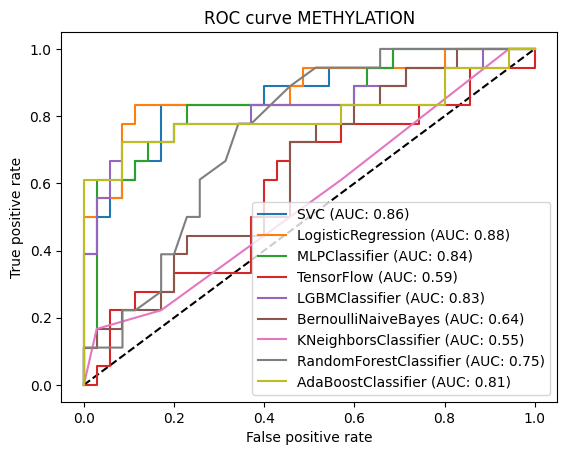

In [34]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

fpr, tpr, thresholds = roc_curve(y_test, y_prob_svc)
auc_val = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='SVC (AUC: {:.2f})'.format(auc_val))

fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
auc_val = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='LogisticRegression (AUC: {:.2f})'.format(auc_val))

fpr, tpr, thresholds = roc_curve(y_test, y_prob_mlp)
auc_val = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='MLPClassifier (AUC: {:.2f})'.format(auc_val))

fpr, tpr, thresholds = roc_curve(y_test, y_prob_tf)
auc_val = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='TensorFlow (AUC: {:.2f})'.format(auc_val))

fpr, tpr, thresholds = roc_curve(y_test, y_prob_lgb)
auc_val = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='LGBMClassifier (AUC: {:.2f})'.format(auc_val))

fpr, tpr, thresholds = roc_curve(y_test, y_prob_bnb)
auc_val = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='BernoulliNaiveBayes (AUC: {:.2f})'.format(auc_val))


fpr, tpr, thresholds = roc_curve(y_test, y_prob_kn)
auc_val = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='KNeighborsClassifier (AUC: {:.2f})'.format(auc_val))

fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
auc_val = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RandomForestClassifier (AUC: {:.2f})'.format(auc_val))



fpr, tpr, thresholds = roc_curve(y_test, y_prob_adb)
auc_val = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='AdaBoostClassifier (AUC: {:.2f})'.format(auc_val))




plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve METHYLATION')
plt.legend(loc='best')
plt.show()


In [35]:
feature_list = feature_subset.tolist()
feature_list.append('Age')
feature_list.append('Gender')
feature_list.append('Stage')
feature_list = np.array(feature_list)

In [36]:
def keras_model(X):
    return model.predict(X, verbose=False).flatten()

In [37]:
import shap
explainer = shap.KernelExplainer(keras_model, X_test[:10])
shap_values = explainer.shap_values(X_test[10:20])

  0%|          | 0/10 [00:00<?, ?it/s]

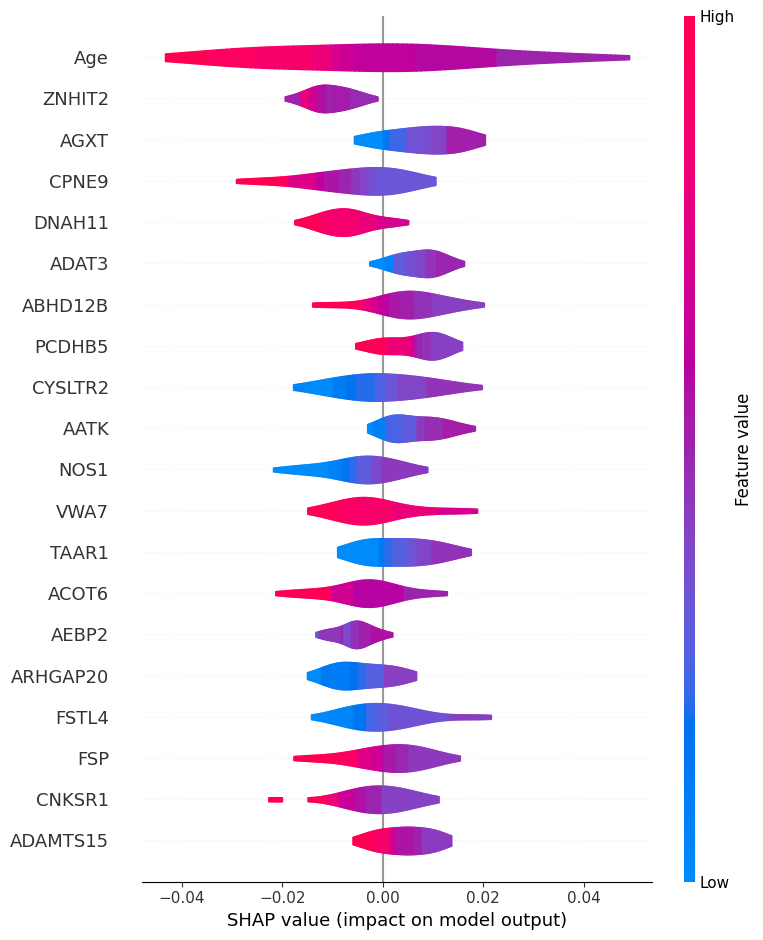

In [38]:
shap.summary_plot(shap_values,X_test[10:20],feature_names=feature_list, plot_type="violin")
plt.show()